<a href="https://colab.research.google.com/github/Tiagoeem/Ensaio_Sobre_o_AutoML/blob/main/Auto_ML_PyCaret_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando PyCaret

Instalando módulos para suporte a GPU, treinamento demorou demais nos primeiros testes. [PyCaret on GPU](https://pycaret.readthedocs.io/en/latest/installation.html)

In [ ]:
!pip install -U pandas-profiling

In [ ]:
!pip install pycaret==2.2.3

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Nota

Este notebook irá testar a performance da biblioteca Pycaret, será testado também a biblioteca H2O.ai em outro notebook ().

# Heart Disease UCI

O conjunto de teste será o famoso Heart Disease da UCI: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


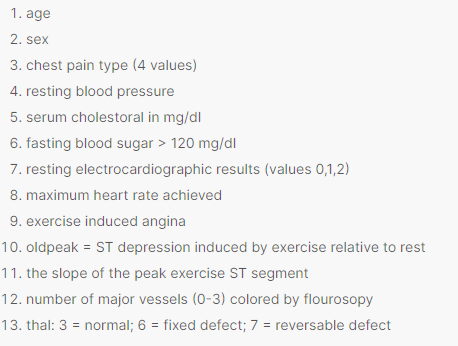

In [4]:
# Baixa o csv a partir de um link para que qualquer pessoa possa executar sem maiores dificuldades
# Uniformiza o trabalho e facilita o compartilhamento de códigos e notebooks
# Realiza o download dos dados e extrai para uma pasta conhecida
import zipfile
import gdown
import os

parent_dir = '/content'

file_name = 'heart.csv'
output = os.path.join( parent_dir, file_name )

if not(os.path.isfile(output)):
    url = 'https://drive.google.com/u/0/uc?id=14DQfvBt2DLX-14DRfCWaxdNjWIq6xkx4'
    gdown.download(url, output=output, quiet=True)


In [5]:
import pandas as pd

df_heart = pd.read_csv('heart.csv')
df_heart.head(3)

age     sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    male   3       145   233    1  ...      0      2.3      0   0     1     yes
1   37    male   2       130   250    0  ...      0      3.5      0   0     2     yes
2   41  female   1       130   204    0  ...      0      1.4      2   0     2     yes

[3 rows x 14 columns]

In [6]:
df_heart.shape

(303, 14)

# Análise Exploratória de Dados (EDA)

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_heart)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Separação de dados

Por padrão o Pycaret separa os dados em Treino e teste (70%, 30%). Mas uma boa pratica é remover de 5% a 10% dos dados para uma validação final após finalização de todo o processo de modelagem e treinamento.

In [8]:
df_validacao_final = df_heart.sample(frac=0.05, random_state=777)
df_heart.drop(df_validacao_final.index, inplace=True)
df_heart.reset_index(inplace=True, drop=True)

In [9]:
print(df_heart.shape)
print(df_validacao_final.shape)

(288, 14)
(15, 14)


# Pycaret com Parâmetros Default

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. **setup()** must be called before executing any other function in pycaret. [Retirado do github oficial do PyCaret](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)

In [10]:
from pycaret.classification import *

clf_default = setup(df_heart, target = 'target', session_id=1, log_experiment=True, experiment_name='Pycaret Default Values')

Description                   Value
0                               session_id                       1
1                                   Target                  target
2                              Target Type                  Binary
3                            Label Encoded           no: 0, yes: 1
4                            Original Data               (288, 14)
5                           Missing Values                   False
6                         Numeric Features                       5
7                     Categorical Features                       8
8                         Ordinal Features                   False
9                High Cardinality Features                   False
10                 High Cardinality Method                    None
11                   Transformed Train Set               (201, 27)
12                    Transformed Test Set                (87, 27)
13                      Shuffle Train-Test                    True
14                     Stratify Train-Test                   False
15                          Fold Generator         StratifiedKFold
16                             Fold Number                      10
17                                CPU Jobs                      -1
18                                 Use GPU                   False
19                          Log Experiment                    True
20                         Experiment Name  Pycaret Default Values
21                                     USI                    a56e
22                         Imputation Type                  simple
23          Iterative Imputation Iteration                    None
24                         Numeric Imputer                    mean
25      Iterative Imputation Numeric Model                    None
26                     Categorical Imputer                constant
27  Iterative Imputation Categorical Model                    None
28           Unknown Categoricals Handling          least_frequent
29                               Normalize                   False
30                        Normalize Method                    None
31                          Transformation                   False
32                   Transformation Method                    None
33                                     PCA                   False
34                              PCA Method                    None
35                          PCA Components                    None
36                     Ignore Low Variance                   False
37                     Combine Rare Levels                   False
38                    Rare Level Threshold                    None
39                         Numeric Binning                   False
40                         Remove Outliers                   False
41                      Outliers Threshold                    None
42                Remove Multicollinearity                   False
43             Multicollinearity Threshold                    None
44                              Clustering                   False
45                    Clustering Iteration                    None
46                     Polynomial Features                   False
47                       Polynomial Degree                    None
48                    Trignometry Features                   False
49                    Polynomial Threshold                    None
50                          Group Features                   False
51                       Feature Selection                   False
52            Features Selection Threshold                    None
53                     Feature Interaction                   False
54                           Feature Ratio                   False
55                   Interaction Threshold                    None
56                           Fix Imbalance                   False
57                    Fix Imbalance Method                   SMOTE

## Comparando modelos

 
"Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case)." [Retirado do github oficial do PyCaret](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)

In [11]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8462  0.0000  0.8841  0.8632   
lda          Linear Discriminant Analysis    0.8412  0.9255  0.8750  0.8609   
lr                    Logistic Regression    0.8410  0.9274  0.8841  0.8543   
nb                            Naive Bayes    0.8210  0.8718  0.8477  0.8459   
catboost              CatBoost Classifier    0.8210  0.9003  0.8477  0.8497   
lightgbm  Light Gradient Boosting Machine    0.8114  0.8980  0.8750  0.8192   
gbc          Gradient Boosting Classifier    0.8062  0.8899  0.8485  0.8260   
ada                  Ada Boost Classifier    0.8060  0.8584  0.8568  0.8205   
rf               Random Forest Classifier    0.7962  0.9027  0.8394  0.8145   
xgboost         Extreme Gradient Boosting    0.7962  0.8998  0.8394  0.8180   
dt               Decision Tree Classifier    0.7714  0.7703  0.7864  0.8130   
et                 Extra Trees Classifier    0.7712  0.8785  0.8030  0.8103   
knn                K Neighbors Classifier    0.6664  0.7312  0.7591  0.6869   
svm                   SVM - Linear Kernel    0.6374  0.0000  0.6924  0.7162   
qda       Quadratic Discriminant Analysis    0.5674  0.5643  0.6008  0.6481   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.8642  0.6846  0.7052     0.018  
lda       0.8587  0.6750  0.6954     0.018  
lr        0.8572  0.6754  0.6975     0.301  
nb        0.8398  0.6357  0.6517     0.019  
catboost  0.8418  0.6343  0.6493     1.651  
lightgbm  0.8401  0.6084  0.6239     0.074  
gbc       0.8297  0.6030  0.6219     0.085  
ada       0.8299  0.6032  0.6229     0.100  
rf        0.8213  0.5826  0.5938     0.466  
xgboost   0.8215  0.5824  0.6006     0.209  
dt        0.7923  0.5376  0.5484     0.017  
et        0.7928  0.5351  0.5638     0.463  
knn       0.7159  0.3131  0.3184     0.117  
svm       0.6539  0.2640  0.2871     0.016  
qda       0.5927  0.1284  0.1517     0.023

## Criando Modelos Individuais (2: Cat e RandomForest)

### CatBoost

In [12]:
# CatBoost
catboost = create_model(estimator='catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8095  0.7870  1.0000  0.7500  0.8571  0.5882  0.6455
1       0.9000  0.9495  0.9091  0.9091  0.9091  0.7980  0.7980
2       0.8500  0.8990  0.7273  1.0000  0.8421  0.7059  0.7385
3       0.8000  0.8485  0.8182  0.8182  0.8182  0.5960  0.5960
4       0.8500  0.9495  0.8182  0.9000  0.8571  0.7000  0.7035
5       0.8000  0.8889  0.9091  0.7692  0.8333  0.5876  0.6005
6       0.9000  0.9798  0.8182  1.0000  0.9000  0.8020  0.8182
7       0.7500  0.9495  0.9091  0.7143  0.8000  0.4792  0.5044
8       0.8000  0.9596  0.8182  0.8182  0.8182  0.5960  0.5960
9       0.7500  0.7917  0.7500  0.8182  0.7826  0.4898  0.4924
Mean    0.8210  0.9003  0.8477  0.8497  0.8418  0.6343  0.6493
SD      0.0507  0.0667  0.0788  0.0943  0.0385  0.1080  0.1073

### Random Forest

In [13]:
# Random Forest
random_forest = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7619  0.8056  0.9167  0.7333  0.8148  0.4928  0.5173
1       0.7500  0.9293  0.7273  0.8000  0.7619  0.5000  0.5025
2       0.8500  0.9394  0.7273  1.0000  0.8421  0.7059  0.7385
3       0.8000  0.8737  0.8182  0.8182  0.8182  0.5960  0.5960
4       0.8500  0.9495  0.8182  0.9000  0.8571  0.7000  0.7035
5       0.7500  0.8788  0.8182  0.7500  0.7826  0.4898  0.4924
6       0.8500  0.8990  0.9091  0.8333  0.8696  0.6939  0.6975
7       0.7500  0.9596  0.9091  0.7143  0.8000  0.4792  0.5044
8       0.9000  1.0000  1.0000  0.8462  0.9167  0.7938  0.8112
9       0.7000  0.7917  0.7500  0.7500  0.7500  0.3750  0.3750
Mean    0.7962  0.9027  0.8394  0.8145  0.8213  0.5826  0.5938
SD      0.0603  0.0634  0.0872  0.0826  0.0487  0.1279  0.1309

## Tunando os Modelos

By default, tune_model optimizes Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in the highest AUC instead of Accuracy. [Retirado do github oficial do PyCaret](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)

### CatBoost

In [14]:
tuned_cat = tune_model(catboost)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8095  0.7037  1.0000  0.7500  0.8571  0.5882  0.6455
1       0.9000  0.9798  0.9091  0.9091  0.9091  0.7980  0.7980
2       0.8000  0.9293  0.6364  1.0000  0.7778  0.6117  0.6637
3       0.8500  0.8485  0.8182  0.9000  0.8571  0.7000  0.7035
4       0.9000  0.9596  1.0000  0.8462  0.9167  0.7938  0.8112
5       0.8000  0.8788  0.9091  0.7692  0.8333  0.5876  0.6005
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.9394  1.0000  0.7333  0.8462  0.5789  0.6383
8       0.9000  0.9899  0.9091  0.9091  0.9091  0.7980  0.7980
9       0.7500  0.7812  0.7500  0.8182  0.7826  0.4898  0.4924
Mean    0.8510  0.9010  0.8932  0.8635  0.8689  0.6946  0.7151
SD      0.0701  0.0928  0.1177  0.0916  0.0636  0.1447  0.1343

### Random Forest

In [15]:
tuned_rf = tune_model(random_forest)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7619  0.7870  0.9167  0.7333  0.8148  0.4928  0.5173
1       0.9000  0.9596  0.8182  1.0000  0.9000  0.8020  0.8182
2       0.8000  0.9394  0.6364  1.0000  0.7778  0.6117  0.6637
3       0.8500  0.8788  0.8182  0.9000  0.8571  0.7000  0.7035
4       0.9000  0.9495  1.0000  0.8462  0.9167  0.7938  0.8112
5       0.7000  0.8788  0.7273  0.7273  0.7273  0.3939  0.3939
6       0.8500  0.9697  0.8182  0.9000  0.8571  0.7000  0.7035
7       0.8000  0.9394  0.9091  0.7692  0.8333  0.5876  0.6005
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7500  0.7396  0.7500  0.8182  0.7826  0.4898  0.4924
Mean    0.8312  0.9042  0.8394  0.8694  0.8467  0.6572  0.6704
SD      0.0832  0.0795  0.1120  0.1024  0.0747  0.1709  0.1700

## Validando os modelos (Métricas e Gráficos)


### Catboost

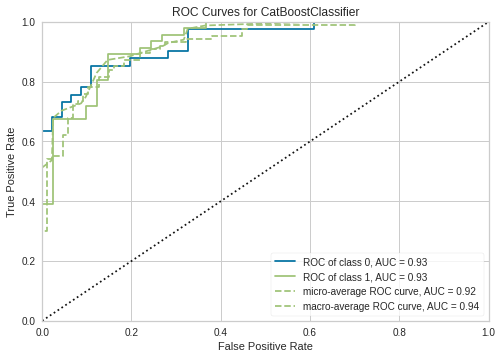

In [16]:
plot_model(tuned_cat, plot='auc')

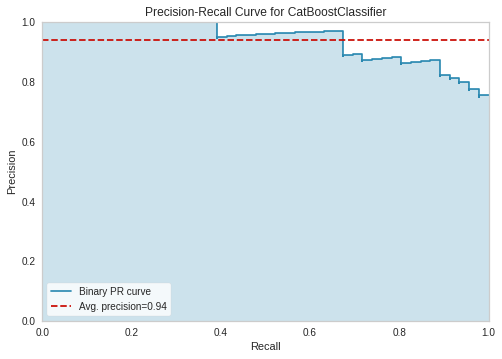

In [17]:
plot_model(tuned_cat, plot = 'pr')

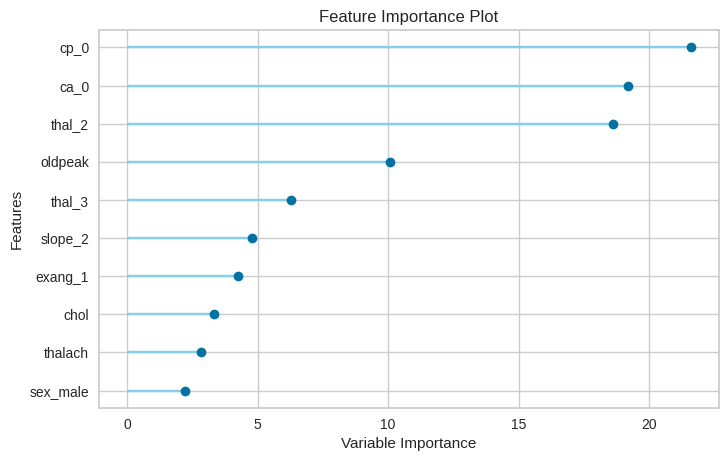

In [18]:
plot_model(tuned_cat, plot='feature')

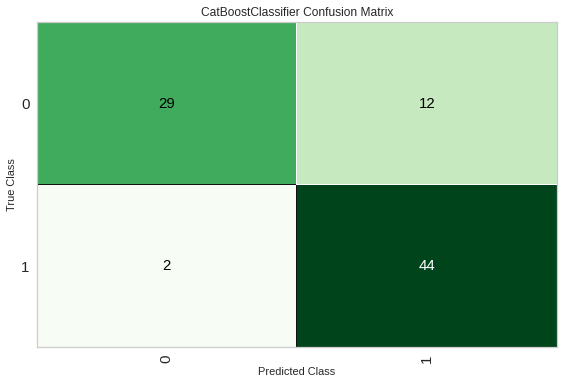

In [19]:
plot_model(tuned_cat, plot = 'confusion_matrix')

### Random Forest

A função **evaluate_model()** inicia uma interface de usuário que permite a seleção do tipo de gráfico, permitindo a validação do modelo com todos as métricas disponíveis pelo PyCaret.

In [20]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Avaliando os conjunto de **Teste**

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. [Retirado do github oficial do PyCaret](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)

### CatBoost

In [21]:
predict_model(tuned_cat).head()

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  CatBoost Classifier    0.8391  0.9348  ...  0.8627  0.6728  0.6919

[1 rows x 8 columns]

age  trestbps   chol  thalach  oldpeak  ...  thal_2  thal_3  target  Label   Score
0  58.0     136.0  319.0    152.0      0.0  ...     1.0     0.0      no    yes  0.7484
1  50.0     144.0  200.0    126.0      0.9  ...     0.0     1.0      no     no  0.6669
2  54.0     120.0  188.0    113.0      1.4  ...     0.0     1.0      no     no  0.8226
3  54.0     132.0  288.0    159.0      0.0  ...     1.0     0.0     yes    yes  0.7139
4  57.0     130.0  236.0    174.0      0.0  ...     1.0     0.0      no    yes  0.7023

[5 rows x 30 columns]

### Random Forest

In [22]:
predict_model(tuned_rf).head()

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Random Forest Classifier    0.8276  0.9268  ...  0.8515  0.6499  0.6647

[1 rows x 8 columns]

age  trestbps   chol  thalach  oldpeak  ...  thal_2  thal_3  target  Label   Score
0  58.0     136.0  319.0    152.0      0.0  ...     1.0     0.0      no    yes  0.6512
1  50.0     144.0  200.0    126.0      0.9  ...     0.0     1.0      no     no  0.6709
2  54.0     120.0  188.0    113.0      1.4  ...     0.0     1.0      no     no  0.7620
3  54.0     132.0  288.0    159.0      0.0  ...     1.0     0.0     yes    yes  0.6603
4  57.0     130.0  236.0    174.0      0.0  ...     1.0     0.0      no    yes  0.6259

[5 rows x 30 columns]

## Realizando a Calibração dos Modelos

Verificar se existe melhora.

In [23]:
best_calib = calibrate_model(tuned_cat)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8095  0.7130  1.0000  0.7500  0.8571  0.5882  0.6455
1       0.9000  0.9697  0.9091  0.9091  0.9091  0.7980  0.7980
2       0.8000  0.9293  0.6364  1.0000  0.7778  0.6117  0.6637
3       0.8500  0.8485  0.8182  0.9000  0.8571  0.7000  0.7035
4       0.9000  0.9596  1.0000  0.8462  0.9167  0.7938  0.8112
5       0.8000  0.8788  0.9091  0.7692  0.8333  0.5876  0.6005
6       0.9500  0.9899  1.0000  0.9167  0.9565  0.8980  0.9027
7       0.8500  0.9394  1.0000  0.7857  0.8800  0.6875  0.7237
8       0.9000  0.9899  0.9091  0.9091  0.9091  0.7980  0.7980
9       0.7500  0.7604  0.7500  0.8182  0.7826  0.4898  0.4924
Mean    0.8510  0.8978  0.8932  0.8604  0.8679  0.6953  0.7139
SD      0.0584  0.0919  0.1177  0.0755  0.0553  0.1201  0.1134

In [24]:
predict_model(best_calib).head()

Model  Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0  CatBoost Classifier    0.8506  0.9353  0.9565    0.8  0.8713  0.6965  0.7124

age  trestbps   chol  thalach  oldpeak  ...  thal_2  thal_3  target  Label   Score
0  58.0     136.0  319.0    152.0      0.0  ...     1.0     0.0      no    yes  0.8136
1  50.0     144.0  200.0    126.0      0.9  ...     0.0     1.0      no     no  0.7641
2  54.0     120.0  188.0    113.0      1.4  ...     0.0     1.0      no     no  0.8725
3  54.0     132.0  288.0    159.0      0.0  ...     1.0     0.0     yes    yes  0.7850
4  57.0     130.0  236.0    174.0      0.0  ...     1.0     0.0      no    yes  0.7714

[5 rows x 30 columns]

Observa-se uma melhora muito baixa, mas que usaremos mesmo assim.

Tunned CatBoost:

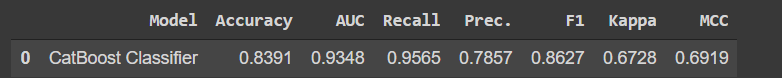


**Tunned + Calibrated CatBoost**

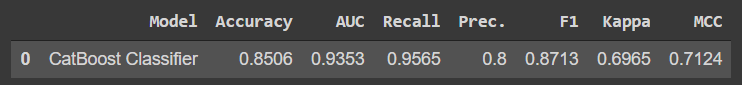

## Finalizando o modelo

Modelo escolhido: CatBoost

The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production. [Retirado do github oficial do PyCaret](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)

In [25]:
final_cat = finalize_model(best_calib)

In [26]:
# Visualizando os parametros do modelo que irá para Deploy
final_cat.get_params()

{'base_estimator': <catboost.core.CatBoostClassifier at 0x7ff3c270c7d0>,
 'base_estimator__border_count': 254,
 'base_estimator__depth': 2,
 'base_estimator__l2_leaf_reg': 5,
 'base_estimator__n_estimators': 70,
 'base_estimator__random_state': 1,
 'base_estimator__random_strength': 0.8,
 'base_estimator__task_type': 'CPU',
 'base_estimator__verbose': False,
 'cv': StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
 'method': 'sigmoid'}

## Validação dados nunca usados

In [27]:
df_unseen = predict_model(final_cat, data=df_validacao_final)
df_unseen.head()

age     sex  cp  trestbps  chol  fbs  ...  slope  ca  thal  target  Label   Score
136   60  female   2       120   178    1  ...      2   0     2     yes    yes  0.9081
89    58  female   0       100   248    0  ...      1   0     2     yes    yes  0.6298
244   56    male   0       132   184    0  ...      1   1     1      no     no  0.9211
273   58    male   0       100   234    0  ...      2   1     3      no     no  0.7932
158   58    male   1       125   220    0  ...      1   4     3     yes     no  0.7220

[5 rows x 16 columns]

In [28]:
from pycaret.utils import check_metric

check_metric(df_unseen['target'], df_unseen['Label'], metric = 'Accuracy')

0.8

# Salvando o modelo

In [29]:
save_model(final_cat,'Final_Cat_16maio2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
         

# Loading do Modelo (Exemplo)

In [30]:
modelo_salvo_cat = load_model('/content/Final_Cat_16maio2021')

Transformation Pipeline and Model Successfully Loaded


In [31]:
predict_model(modelo_salvo_cat, data=df_unseen)

age     sex  cp  trestbps  chol  fbs  ...  slope  ca  thal  target  Label   Score
136   60  female   2       120   178    1  ...      2   0     2     yes    yes  0.9081
89    58  female   0       100   248    0  ...      1   0     2     yes    yes  0.6298
244   56    male   0       132   184    0  ...      1   1     1      no     no  0.9211
273   58    male   0       100   234    0  ...      2   1     3      no     no  0.7932
158   58    male   1       125   220    0  ...      1   4     3     yes     no  0.7220
260   66  female   0       178   228    1  ...      1   2     3      no     no  0.9265
19    69  female   3       140   239    0  ...      2   2     2     yes    yes  0.7275
249   69    male   2       140   254    0  ...      1   3     3      no     no  0.7853
25    71  female   1       160   302    0  ...      2   2     2     yes    yes  0.7927
208   49    male   2       120   188    0  ...      1   3     3      no     no  0.7662
283   40    male   0       152   223    0  ...      2   0     3      no    yes  0.6016
107   45  female   0       138   236    0  ...      1   0     2     yes    yes  0.6775
230   47    male   2       108   243    0  ...      2   0     2      no    yes  0.9222
147   60  female   3       150   240    0  ...      2   0     2     yes    yes  0.9015
268   54    male   0       122   286    0  ...      1   2     2      no     no  0.8911

[15 rows x 16 columns]